More learning using python & PIL

further inspiration from: https://alexwlchan.net/2022/10/circle-experiments/

Also https://www.blog.pythonlibrary.org/2021/02/23/drawing-shapes-on-images-with-python-and-pillow/


First test - draw other shapes rather than just squares

Try circles, rectangles plus trianges

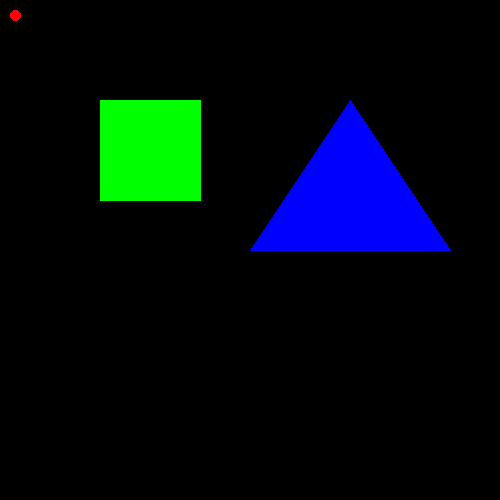

In [1]:
import random
from PIL import Image, ImageDraw

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

#draw a red circle
draw.ellipse([(10, 10), (20, 20)], fill=(255, 0, 0))

#draw a green rectangle
draw.rectangle([(100, 100), (200, 200)], fill=(0, 255, 0))

#draw a blue triange
draw.polygon([(250, 250), (350, 100), (450, 250) ], fill=(0, 0, 255))

# display the image
im
#im.save('red_circle.png')

Test 2 - draw many shapes of different sizes and colours using a loop

use random to select random points for each shape. 

use random to select random colours for each shape. 

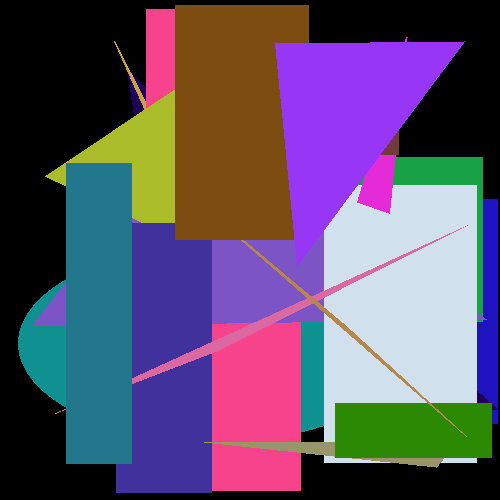

In [2]:

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

# sets how many of each shape to draw
numberOfLoops = 10

# draw a (numberOfLoops) number of each shape
# create random points for each shape
# create random colours for each shape
for i in range(numberOfLoops):
    
    draw.ellipse([
        (random.randint(0, 500), random.randint(0, 500)), 
        (random.randint(0, 500), random.randint(0, 500))],
        fill=(
            random.randint(0, 255), 
            random.randint(0, 255),
            random.randint(0, 255)
        )
    )

    draw.rectangle([
        (random.randint(0, 500), random.randint(0, 500)), 
        (random.randint(0, 500), random.randint(0, 500))],
        fill=(
            random.randint(0, 255), 
            random.randint(0, 255),
            random.randint(0, 255)
        )
    )
    
    draw.polygon([
        (random.randint(0, 500), random.randint(0, 500)), 
        (random.randint(0, 500), random.randint(0, 500)), 
        (random.randint(0, 500), random.randint(0, 500))],
        fill=(
            random.randint(0, 255), 
            random.randint(0, 255),
            random.randint(0, 255)
        )
    )


# display the image
im

Test 3 - create an equal sided triangle

The PIL library does not provide a simple way to create an equal sided triangle

Create a simple function to create an equilateral triangle 

The python module math can be used so can use sqrt - to calculate square root 

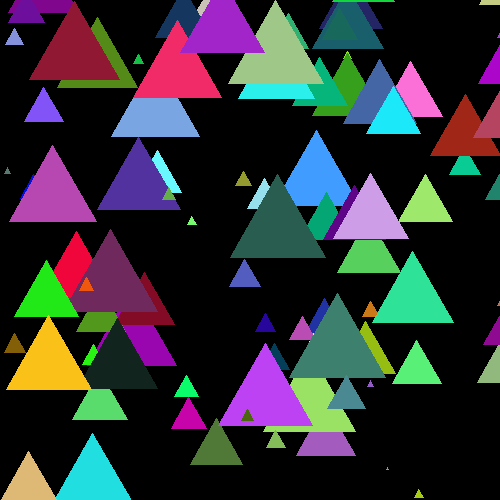

In [3]:

import math

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

# create a function that draws an equilateral triangle
def draw_equilateral_triangle(draw, img, x1, y1, length, myFill):

    # find the mid point using standard math
    mid_x = x1+(length/2)
    mid_y = y1-(length*math.sqrt(3)/2)

    draw.polygon([(x1, y1), (mid_x, mid_y), (x1+length, y1) ], fill=myFill)


# sets how many of each shape to draw
numberOfLoops = 100
    
for i in range(numberOfLoops):
    
    draw_equilateral_triangle(draw, im, 
                              random.randint(0, 500), 
                              random.randint(0, 500), 
                              random.randint(0, 100), (
                                  random.randint(0, 255), 
                                  random.randint(0, 255), 
                                  random.randint(0, 255)
                              )
                             )
                                      

im

Learn. 

From https://alexwlchan.net/2022/10/circle-experiments/ colourt shades are used which look great

Alex also makes it so that the circles can be drawn outside of the actual visible image area - which looks good also

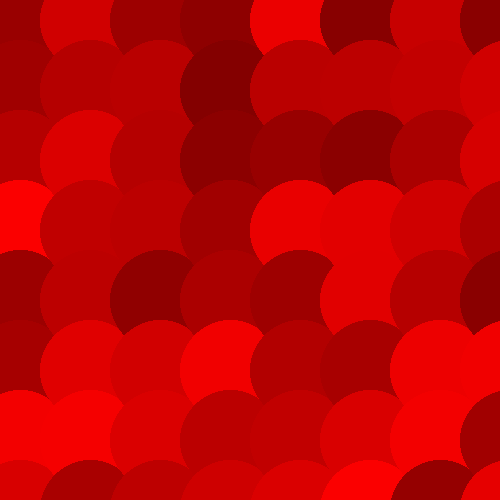

In [4]:

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

# -100 is outside of the visible x (to the left) and y range (above) 
# 600 is outside of the visible x (to the right) and y range (below)
for x in range(-100, 600, 70):
    for y in range(-100, 600, 70):
        draw.ellipse(
            [(x, y), (x + 100, y + 100)],
            fill=(random.randint(128, 255), 0, 0)
        )

im
#im.save('grid_of_circles.png')

Test - try the same approach but with the equilateral trianges and try in blue shades also

by making the trianges large (side length = 200) the triangles overlap to give an interesting pattern 

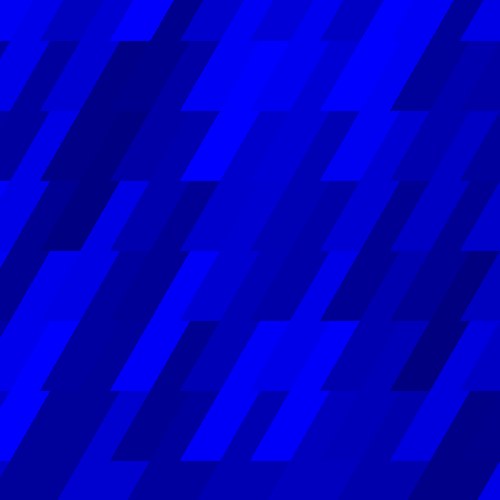

In [5]:

im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

for x in range(-100, 600, 70):
    for y in range(-100, 600, 70):
        draw_equilateral_triangle(draw, im, x, y, 200, (0, 0, random.randint(128, 255)))

im

Learn - Alex also shows how in the example above each shape is neatly on top of the previous shape going left to right and top to bottom

But instead you can get the same set of positions for each shape but can write the order randomly. This gives a very different pattern

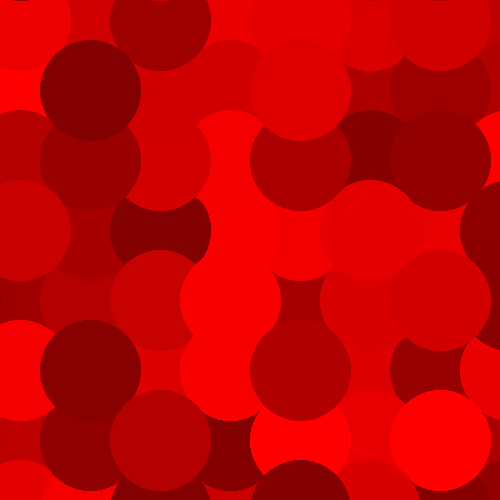

In [6]:

im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

coords = [
    (x, y)
    for x in range(-100, 600, 70)
    for y in range(-100, 600, 70)
]

# mix up the coordinates
random.shuffle(coords)

# loop through the set of mixed up coordinates
for (x, y) in coords:
    draw.ellipse(
        [(x, y), (x + 100, y + 100)],
        fill=(random.randint(128, 255), 0, 0)
    )

im


Test - try this same thing with the triangles. 

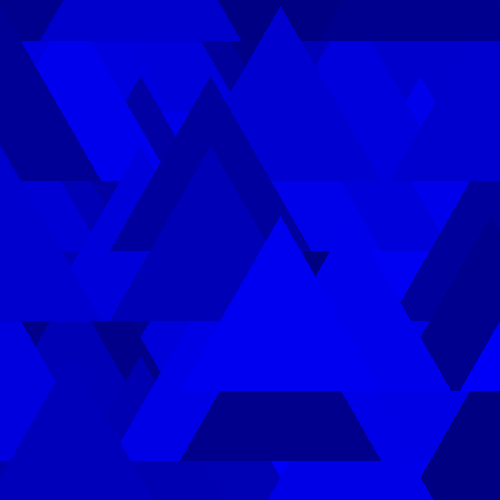

In [7]:

im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

coords = [
    (x, y)
    for x in range(-100, 600, 70)
    for y in range(-100, 600, 70)
]

random.shuffle(coords)

for (x, y) in coords:
    
    draw_equilateral_triangle(draw, im, x, y, 200, (0, 0, random.randint(128, 255)))
      
im

Learn and test. 

Inspired by https://jyopari.github.io/randomCirc.html to draw smaller circles with the outline of a large circle

Math is used to select random points that fall within the area of a large circle

Interesting different outputs can be created by changing the number and size of the smaller circles and also changing the radius of the larger circle

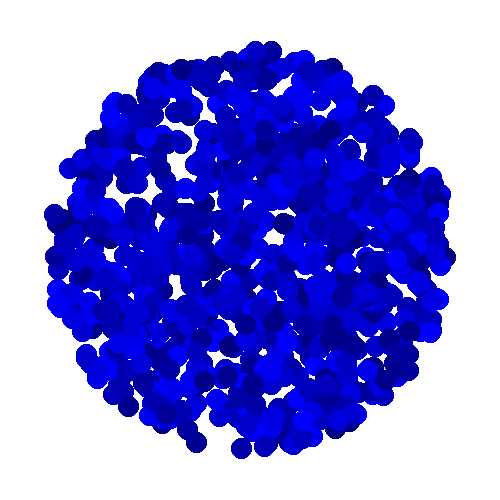

In [8]:


im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

# number of and radius of small "fill" circles
number_of_circles = 1000
circle_radius = 10

#radius of large circle
R = 200
# x,y centre point of large circle
midX = 250
midY = 250

# the math that makes sure random x, y points fall within the larger circle
for i in range(number_of_circles):
        theta = random.uniform(0,2*math.pi)
        r = random.uniform(0,R)
        x = midX+(math.sqrt(r*R)*math.cos(theta))
        y = midY+(math.sqrt(r*R)*math.sin(theta))
        draw.ellipse(
            [(x - circle_radius, y - circle_radius), (x + circle_radius, y + circle_radius)],
            fill=(0,0, random.randint(128, 255))
        )

im